In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
torch.manual_seed(42)

In [19]:
df = pd.read_csv('/content/data.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


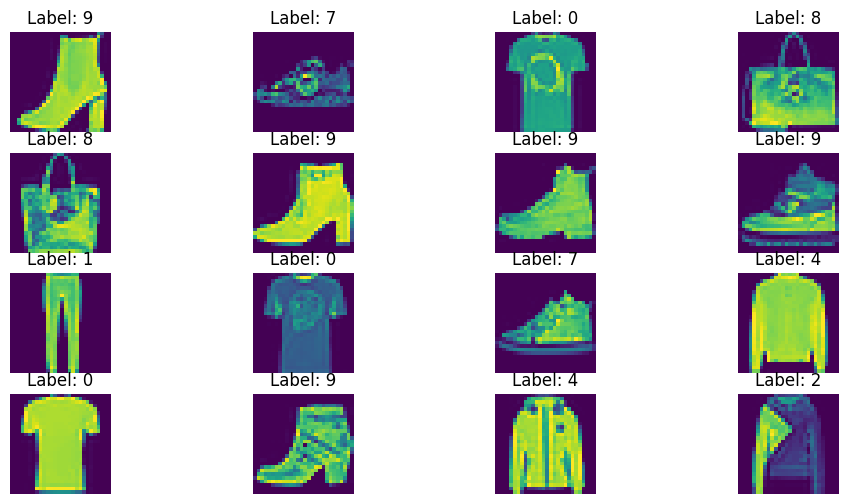

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 6))

# plot the first 16 images
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label: {df.iloc[i, 0]}")



In [21]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [23]:
# scaling
x_train = x_train/255
x_test = x_test/255

In [24]:
# custom dataset classs
class CustomDataset(Dataset):

  def __init__(self,features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [25]:
# create train dataset object
train_dataset = CustomDataset(x_train, y_train)

In [26]:
# create test dataset object
test_dataset = CustomDataset(x_test, y_test)

In [27]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [28]:
len(train_loader)

150

In [29]:
# define nn class
class MyNN(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)

In [30]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [31]:
# instatiate the model
model = MyNN(x_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optmizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
# training loop
for epoch in range(epochs):

  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # update gradients
    optimizer.step()

    total_epoch_loss += loss.item()

  print(f'Epoch: {epoch+1}, Loss: {total_epoch_loss/len(train_loader)}')

Epoch: 1, Loss: 1.3216368440786999
Epoch: 2, Loss: 0.7793365436792373
Epoch: 3, Loss: 0.6427524652083715
Epoch: 4, Loss: 0.5751657336950302
Epoch: 5, Loss: 0.528180201848348
Epoch: 6, Loss: 0.49528750121593473
Epoch: 7, Loss: 0.4602432996034622
Epoch: 8, Loss: 0.4359459094206492
Epoch: 9, Loss: 0.41829214423894884
Epoch: 10, Loss: 0.3984092291692893
Epoch: 11, Loss: 0.3850264506538709
Epoch: 12, Loss: 0.3722685620188713
Epoch: 13, Loss: 0.3477362078428268
Epoch: 14, Loss: 0.3467242218057315
Epoch: 15, Loss: 0.3138812760512034
Epoch: 16, Loss: 0.3126461291313171
Epoch: 17, Loss: 0.29552092105150224
Epoch: 18, Loss: 0.2857150869568189
Epoch: 19, Loss: 0.27084775785605114
Epoch: 20, Loss: 0.26237100958824155
Epoch: 21, Loss: 0.25756089876095456
Epoch: 22, Loss: 0.24232648963729542
Epoch: 23, Loss: 0.23957946779827277
Epoch: 24, Loss: 0.2261324493587017
Epoch: 25, Loss: 0.2233684351791938
Epoch: 26, Loss: 0.21165308925012746
Epoch: 27, Loss: 0.21910773759086927
Epoch: 28, Loss: 0.211038921

In [33]:
# model evaluation
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [34]:
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total += batch_labels.shape[0]

    correct += (predicted == batch_labels).sum().item()

print(correct/total)

0.8325
